In [16]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd

https://lifehacker.ru/topics/technology/ - отсюда мы начали

https://lifehacker.ru/topics/technology/?page=2 - тут поняли, как строятся страницы от 1 до 10

https://lifehacker.ru/ssd-dlya-ps5/#comments - тут как раздел комментов устроен

https://lifehacker.ru/opera-one-r2/ - тут как собирается все ссылка - нет /technology/ блока

In [14]:
base_url = 'https://lifehacker.ru'
response = requests.get('https://lifehacker.ru/topics/technology/?page=1')
soup = BeautifulSoup(response.text, 'lxml')

In [3]:
raw_items = soup.find_all('a', class_='lh-article-card-controls__comments')
links = [item.get('href').replace('/#comments', '') for item in raw_items]
links

['/rouming-v-soyuznom-gosudarstve',
 '/dozator-myla-xiaomi',
 '/prodazhi-rossiiskix-noutbukov',
 '/luchshie-prilozheniya-dlya-cshtvshhcy-2024',
 '/yandeks-muzyka-umnye-filtry',
 '/anons-realme-gt7-pro',
 '/prilozheniya-ios-oktyabr-2024',
 '/smartfony-oktyabrya-2024',
 '/nedorogie-igrovye-monitory',
 '/ssd-dlya-ps5',
 '/novye-macbook-pro-imac-i-mac-mini-s-m4-v-rossii',
 '/apple-pokupaet-pixelmator',
 '/nejroseti-dlya-ozvuchivaniya-teksta',
 '/spiski-chatov-v-whatsapp',
 '/samsung-mozhet-vypustit-galaxy-s25-slim',
 '/kak-vybrat-uvlazhnitel-vozduxa',
 '/telegram-kachestvo-video',
 '/chatgpt-poisk-po-internetu',
 '/obzor-tecno-phantom-v-flip',
 '/anons-oneplus-13',
 '/anons-mudita-kompakt',
 '/anons-nintendo-music',
 '/anons-honor-watch-5',
 '/vybiraem-planshet-s-bolshim-ekranom',
 '/anons-macbook-pro-m4',
 '/anons-nothing-phone-2a-plus-community-edition',
 '/anons-honor-magic-7',
 '/skladnye-smartfony-2024',
 '/anons-xiaomi-watch-s4']

In [4]:
parsed_urls = []

In [8]:
for page_num in range(1, 11):
    url = f'{base_url}/?page={page_num}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    raw_items = soup.find_all('a', class_='lh-article-card-controls__comments')
    parsed_urls += [item.get('href').replace('/#comments', '') for item in raw_items]

In [9]:
len(parsed_urls)

296

In [10]:
parsed_urls[40:60]

['/huawei-mate-xt-test-na-prochnost',
 '/kontrol-nad-zhiznyu',
 '/nejrosetj-camb-ai-dlya-ozvuchki',
 '/dynamic-island-v-android',
 '/podderzhka-smartfonov-redmi',
 '/redaktor-izobrazhenii-v-midjourney',
 '/tochnye-prognozy-pogody-android-ios',
 '/predstavlen-fontan-hiigge-snowball',
 '/kak-vybrat-mikrovolnovku',
 '/nedelya-anonsov-mac',
 '/predstavlena-ayn-odin-2-portal',
 '/predstavlena-yandexgpt-4',
 '/podderzhivayushhie-one-ui-7-ustroistva',
 '/raskryt-dizain-xiaomi-15',
 '/nastolnye-posudomoiki',
 '/temnaya-tema-v-google-kalendare',
 '/anons-astropad-bookcase',
 '/opera-one-r2',
 '/podderzhivaemye-magicos-9-0-ustroistva',
 '/adobe-fresco-stalo-besplatnym']

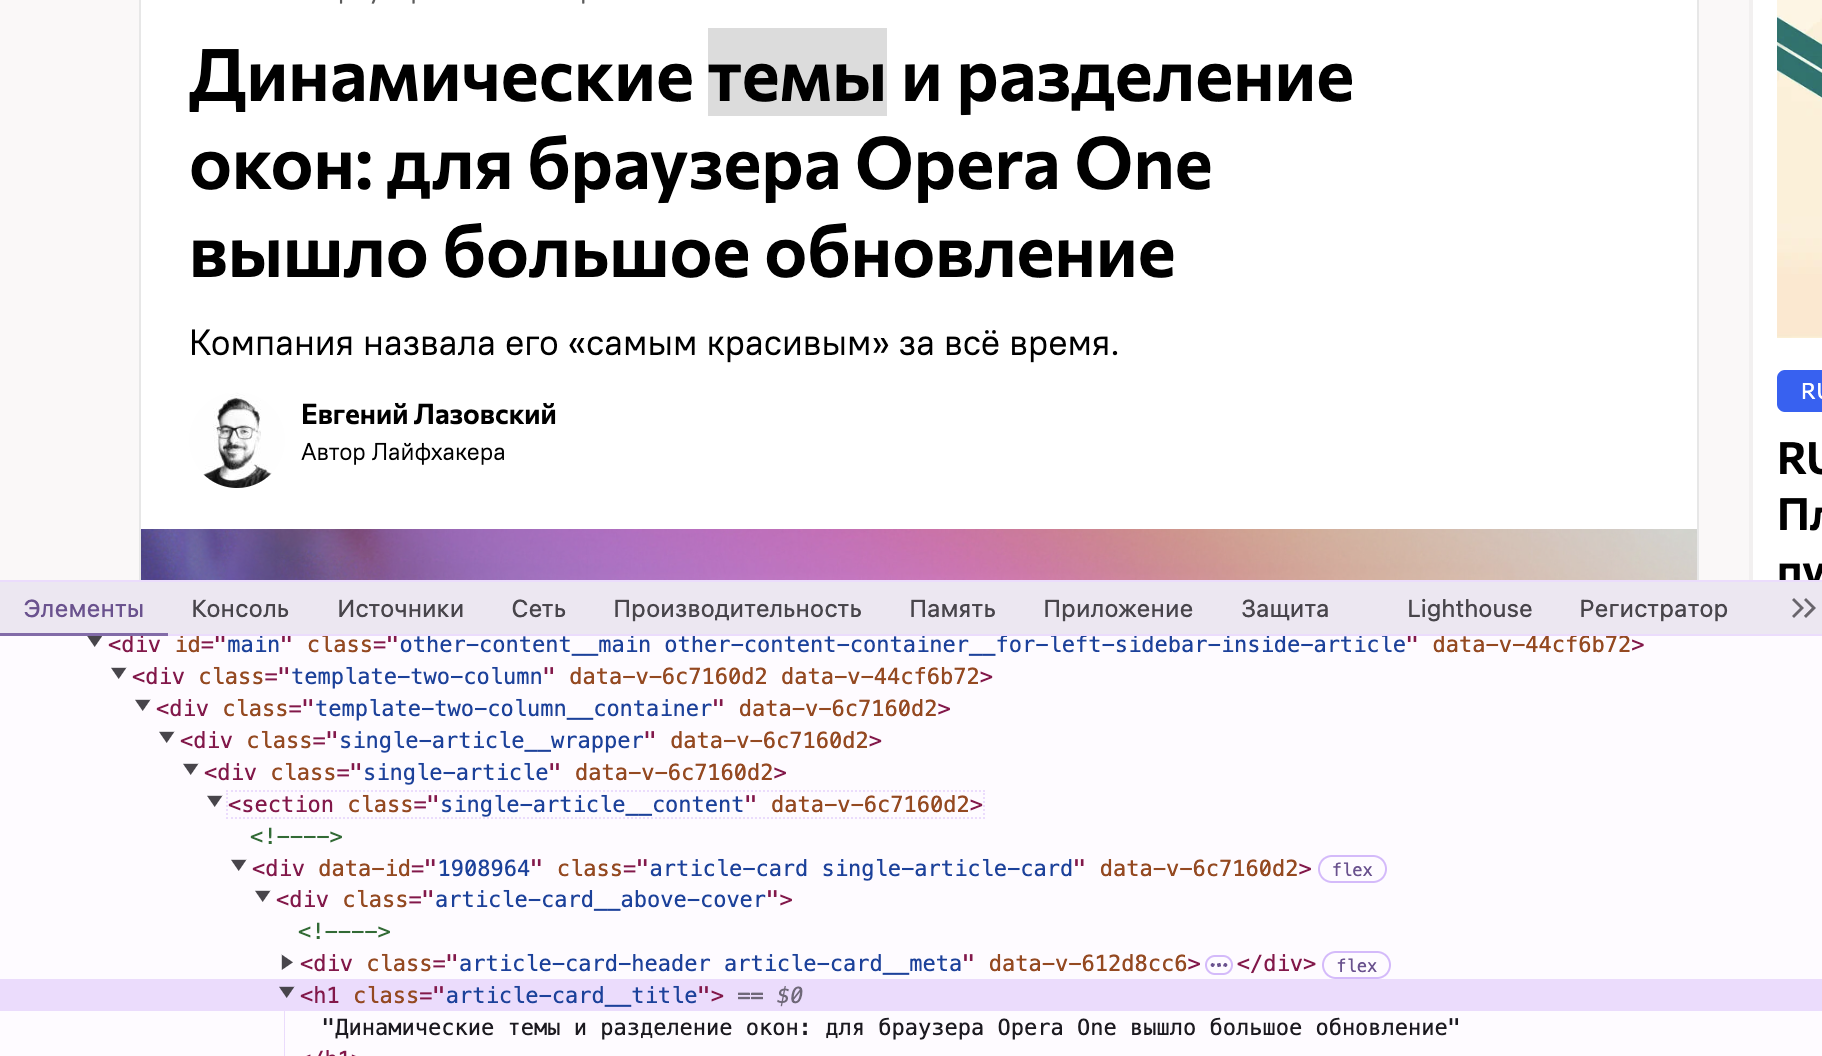

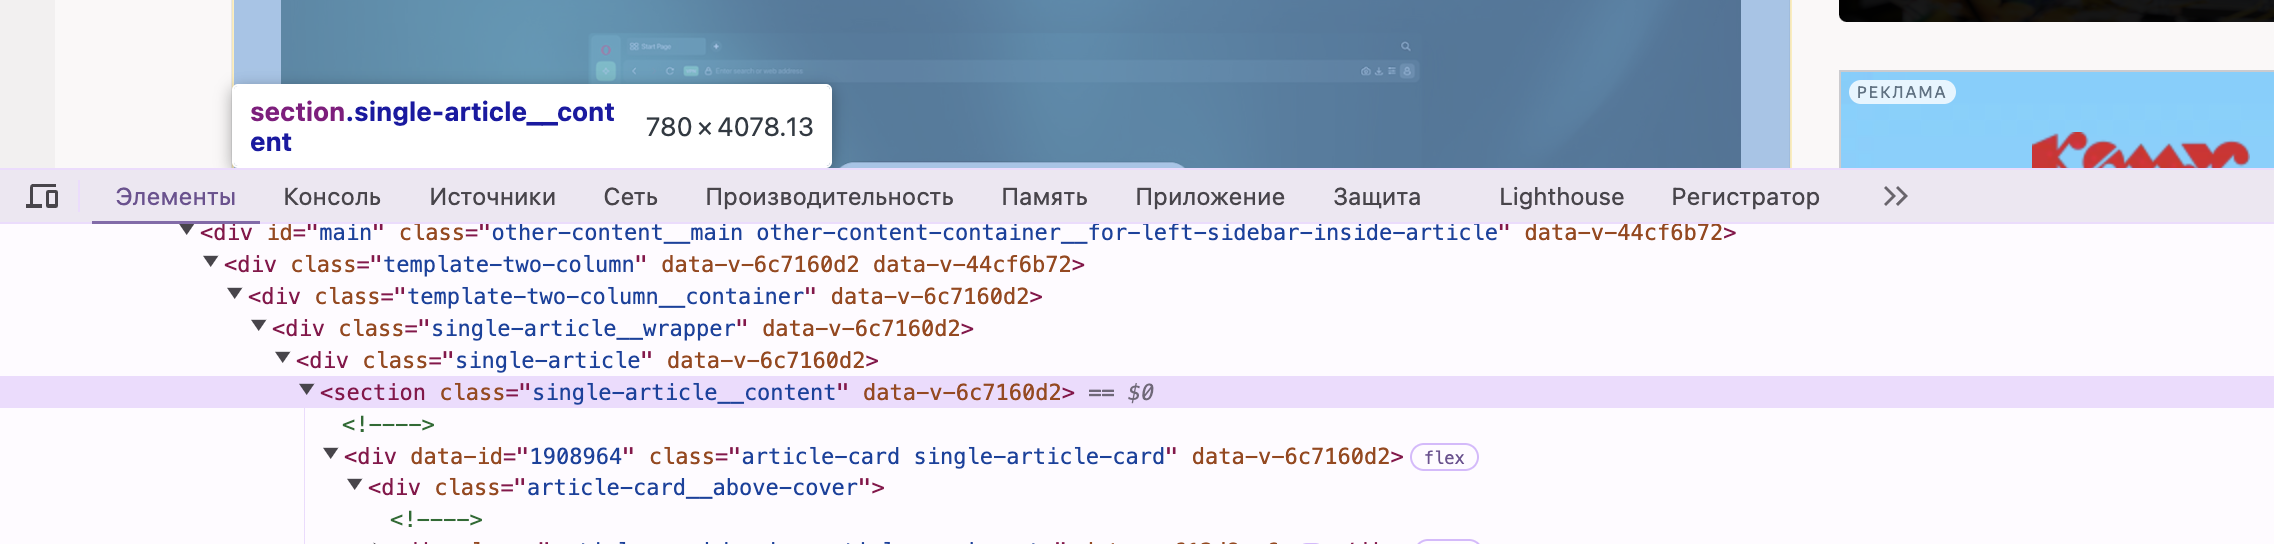

In [15]:
result = []
for url in tqdm(parsed_urls):
    article = {}
    article_url = f'{base_url}{url}'
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'lxml')


    article['title'] = soup.find('h1', class_='article-card__title').text
    article['text'] = soup.find('section', class_='single-article__content').text

    result.append(article)

100%|██████████| 296/296 [06:23<00:00,  1.29s/it]


In [17]:
pd.set_option('display.max_colwidth', 400)



data = pd.DataFrame(result)
data.head()

,title,text
0,Роуминг между Россией и Беларусью отменят в 2025 году,"НовостиТехнологии \n Вчера\n Роуминг между Россией и Беларусью отменят в 2025 годуНаконец-то можно будет экономить на мобильной связи и интернете во время путешествий. Макс Вильтовский Автор Лайфхакера Избранное Совет министров Союзного государства России и Беларуси согласовал отмену роуминга между двумя странами. Ожидается, что он перестанет действовать с 1 марта 2025 года.Соглаш..."
1,Xiaomi представила дозатор мыла в виде уточки с автономностью до 180 дней,НовостиУстройства \n Вчера\n Xiaomi представила дозатор мыла в виде уточки с автономностью до 180 днейЭто нам надо. Макс Вильтовский Автор Лайфхакера Избранное Xiaomi показала бесконтактный дозатор мыла Mijia Line Friends Limited Edition. Он выполнен в форме жёлтой уточки Салли — одного из персонажей креативной студии Line Friends. Как только пользователь подносит открытую ладонь ...
2,OSiO и Irbis: отечественные ноутбуки впервые обошли американские по продажам в РФ,"НовостиТехнологии \n Вчера\n OSiO и Irbis: отечественные ноутбуки впервые обошли американские по продажам в РФА вы уже присматриваетесь к российским новинкам? Макс Вильтовский Автор Лайфхакера Избранное Российские ноутбуки впервые обошли по продажам в стране американские бренды. Об этом свидетельствует статистика за девять месяцев 2024 года, пишет «Коммерсантъ».С января по середин..."
3,"Названы лучшие приложения 2024 года для Windows, которые доступны в Microsoft Store","НовостиWindows \n Вчера\n Названы лучшие приложения 2024 года для Windows, которые доступны в Microsoft StoreОт простого задачника до цифрового дневника и аркадной гонки.\n Макс Вильтовский Автор Лайфхакера Избранное Microsoft объявила лауреатов своей ежегодной премии Microsoft Store Awards, в рамках которой отмечаются лучшие приложения для Windows. В конкурсе могут участвовать то..."
4,В «Яндекс Музыке» появились умные фильтры для быстрого поиска сохранённых песен,"НовостиВеб-сервисы \n Вчера\n В «Яндекс Музыке» появились умные фильтры для быстрого поиска сохранённых песенСреди них — «Рок», «Поп», «Спокойное», «Бодрое» и другие. Евгений Лазовский Автор Лайфхакера Избранное В «Яндекс Музыке» теперь есть умные фильтры. Они позволяют быстро находить в своём списке сохранённых треков песни нужного жанра или под нужное настроение.Умные фильтры — ..."


Заголовок выгрузился отлично. Текст немного корявый, но это максимальная содержательность, которой я при парсинге смогла добиться.